In [2]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%pylab inline

# load pima-indians-diabetes data, it's a binary classification task
dataset = loadtxt("data.txt", delimiter=",")

# split data into X (features) and y (label)
X = dataset[:, 0:8]
y = dataset[:, 8]

Populating the interactive namespace from numpy and matplotlib


In [3]:
print(X.shape)

(768, 8)


In [4]:
print(y.shape)

(768,)


In [5]:
# we have two labels, 0 with no diabetes, 1 with disbetes
y[:5]

array([1., 0., 1., 0., 1.])

In [6]:
# split our data into train & test
# train : test = 0.67 : 0.33
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=7,
                                                    test_size=0.33)

In [7]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
eval_set = [(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train,
          y_train,
          early_stopping_rounds=10,
          eval_metric="auc",
          eval_set=eval_set,
          verbose=True)

[0]	validation_0-auc:0.81783
Will train until validation_0-auc hasn't improved in 10 rounds.
[1]	validation_0-auc:0.81686
[2]	validation_0-auc:0.81730
[3]	validation_0-auc:0.82491
[4]	validation_0-auc:0.82303
[5]	validation_0-auc:0.82495
[6]	validation_0-auc:0.82263
[7]	validation_0-auc:0.82703
[8]	validation_0-auc:0.82424
[9]	validation_0-auc:0.82511
[10]	validation_0-auc:0.82371
[11]	validation_0-auc:0.82656
[12]	validation_0-auc:0.82609
[13]	validation_0-auc:0.82864
[14]	validation_0-auc:0.82619
[15]	validation_0-auc:0.82726
[16]	validation_0-auc:0.82468
[17]	validation_0-auc:0.82535
[18]	validation_0-auc:0.82780
[19]	validation_0-auc:0.83021
[20]	validation_0-auc:0.82951
[21]	validation_0-auc:0.82786
[22]	validation_0-auc:0.82834
[23]	validation_0-auc:0.82877
[24]	validation_0-auc:0.82844
[25]	validation_0-auc:0.82901
[26]	validation_0-auc:0.82844
[27]	validation_0-auc:0.82917
[28]	validation_0-auc:0.82870
[29]	validation_0-auc:0.82904
Stopping. Best iteration:
[19]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              verbosity=1)

In [8]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(X_test)
y_pred[:5]

array([[0.8861989 , 0.11380111],
       [0.1685105 , 0.8314895 ],
       [0.43833125, 0.56166875],
       [0.8861989 , 0.11380111],
       [0.54149556, 0.4585044 ]], dtype=float32)

In [9]:
# we use model.predict to get the label
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


In [10]:
# we can show the feature importances for our features
print(model.feature_importances_)

[0.07617985 0.32839927 0.03868151 0.0612992  0.11615451 0.17635493
 0.09744125 0.10548946]


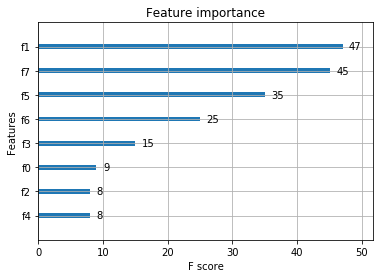

In [11]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [12]:
!pip install graphviz

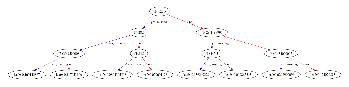

In [13]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams

plot_tree(model, num_trees=1)
# plt.title("max_depth = 100, with gamma = 10")
# plt.savefig("tree_with_max_depth_gamma", dpi = 700)

## Reference for XGBoost

[Well explained for Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)

[Analytic vidhya parameter tuning](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)
[How parralle xgboost work](http://zhanpengfang.github.io/418home.html)

[How to tune gamma](https://medium.com/data-design/xgboost-hi-im-gamma-what-can-i-do-for-you-and-the-tuning-of-regularization-a42ea17e6ab6)

[slides for xgboost by tqchen](http://homes.cs.washington.edu/~tqchen/pdf/BoostedTree.pdf)

[slides for xgboost by kaggle winner](https://www.slideshare.net/ShangxuanZhang/kaggle-winning-solution-xgboost-algorithm-let-us-learn-from-its-author)

[xgboost 理論與參數介紹](https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC5-2%E8%AC%9B-kaggle%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E7%AB%B6%E8%B3%BD%E7%A5%9E%E5%99%A8xgboost%E4%BB%8B%E7%B4%B9-1c8f55cffcc)
